<a href="https://colab.research.google.com/github/Pralay567/Iris-DecisionTree-MLTask/blob/main/Iris_DecisionTree_MLTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
✅ Preprocessing Complete
Train Shape: (120, 4)  Test Shape: (30, 4)

📊 Decision Tree Results
Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



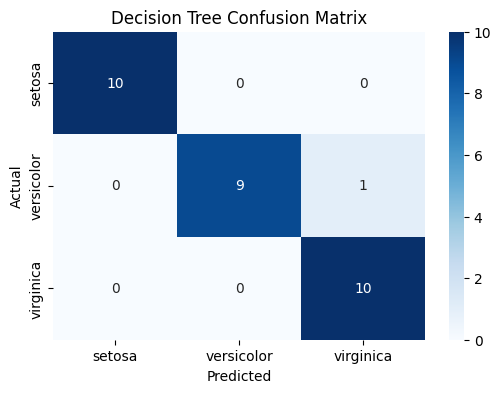

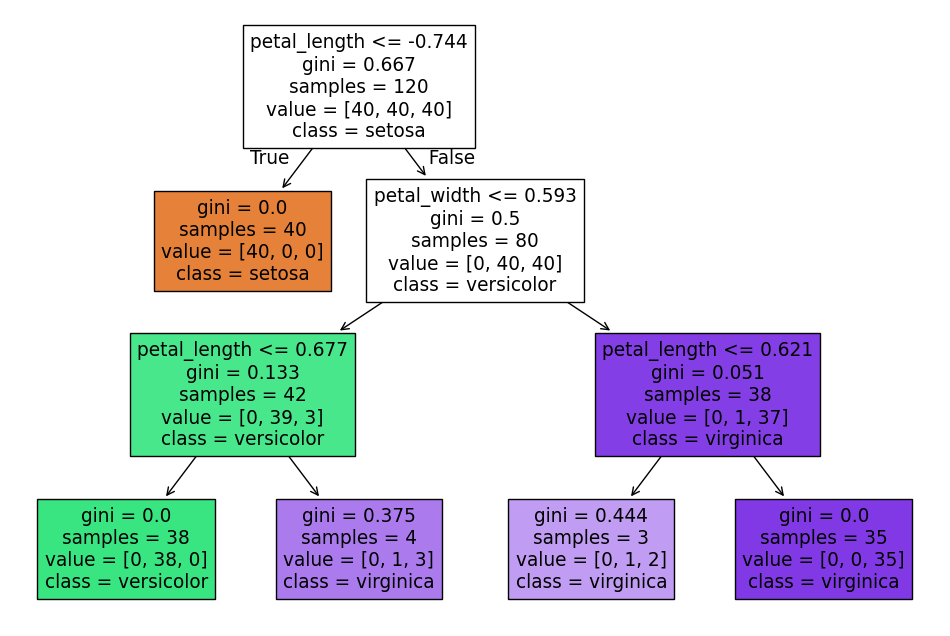


📊 Random Forest Results
Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



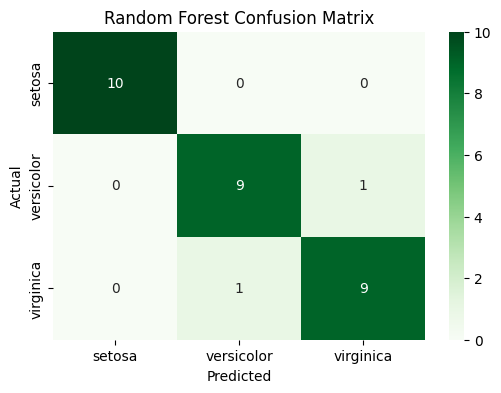

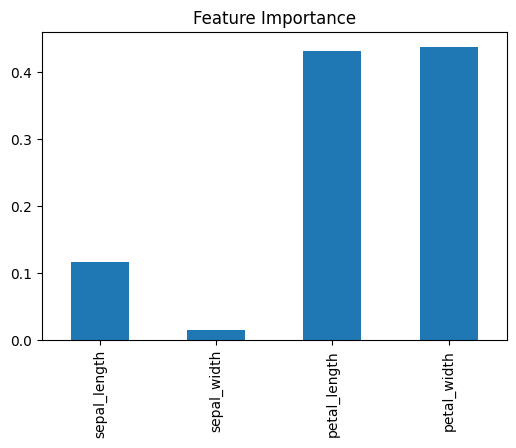

In [4]:
# ===============================
# 📌 Task 1: Data Preprocessing
# ===============================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
df = pd.read_csv("/content/1) iris.csv")  # Change path if needed
print("Dataset Head:\n", df.head())

# 1. Handle missing values (here Iris has none, but code works for other datasets)
df.fillna(df.mean(numeric_only=True), inplace=True)   # numeric columns
df.fillna(df.mode().iloc[0], inplace=True)            # categorical columns

# 2. Encode categorical variable (species)
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# 3. Normalize numerical features
scaler = StandardScaler()
df[['sepal_length','sepal_width','petal_length','petal_width']] = scaler.fit_transform(
    df[['sepal_length','sepal_width','petal_length','petal_width']]
)

# 4. Train-test split
X = df.drop(columns=['species','species_encoded'])  # features
y = df['species_encoded']                           # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Preprocessing Complete")
print("Train Shape:", X_train.shape, " Test Shape:", X_test.shape)


# ===============================
# 📌 Task 2: Decision Tree Classifier
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("\n📊 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()


# ===============================
# 📌 Task 3: Random Forest Classifier
# ===============================

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("\n📊 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Feature Importance
feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance.plot(kind='bar', title="Feature Importance", figsize=(6,4))
plt.show()
